In [32]:
# First xgboost model for pima indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [33]:
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [34]:
# split data into X and Y
X = dataset[:,0:8]
Y = dataset[:,8]

In [35]:
# Split data into tain and test sets
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [37]:
# Fit model on training data
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X,Y)
# eval_set = [(X_test, Y_test)]
# Running a model with this configuration will report the performance of the model after each tree is added.
# Summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, params in zip(means, stds, params):
    print("{} ({}) with {}".format(mean, stdev, params))
# model.fit(X_train, Y_train, early_stopping_rounds = 10, eval_metric="logloss", eval_set=eval_set, verbose=True)

Best: -0.48301286355854245 using {'learning_rate': 0.1}
-0.6896501316999396 (0.00024245798655214752) with {'learning_rate': 0.0001}
-0.6612739434931427 (0.0019541109937047155) with {'learning_rate': 0.001}
-0.530746631246681 (0.022961312658136404) with {'learning_rate': 0.01}
-0.48301286355854245 (0.0607546057876345) with {'learning_rate': 0.1}
-0.5154398287086602 (0.06897403113840161) with {'learning_rate': 0.2}
-0.5573146926975975 (0.08173771746718994) with {'learning_rate': 0.3}


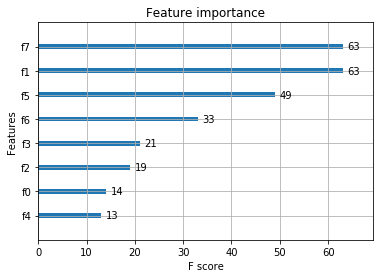

In [29]:
# Plot feature importance
plot_importance(model)
pyplot.show()

In [17]:
# Make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
print(predictions)

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,

In [19]:
# Evaluate Predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: {}".format(accuracy*100))

Accuracy: 77.95275590551181
